In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [8]:
file='https://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data'
all_variables =['name','hobby','age','educational level','marital status','target']
features=['name','hobby','age','educational level','marital status']
target=['target']
df = pd.read_csv(file, names=all_variables)
df.head()

,name,hobby,age,educational level,marital status,target
0,92,2,1,1,2,1
1,10,2,1,3,2,2
2,83,3,1,4,1,3
3,61,2,4,2,2,3
4,107,1,1,3,4,3


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

,name,hobby,age,educational level,marital status
0,0.694656,0.5,0.0,0.000000,0.333333
1,0.068702,0.5,0.0,0.666667,0.333333
2,0.625954,1.0,0.0,1.000000,0.000000
3,0.458015,0.5,1.0,0.333333,0.333333
4,0.809160,0.0,0.0,0.666667,1.000000


In [10]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)
df_pca.head()

,name,hobby,age,educational level,marital status
0,25.503614,0.343741,-0.770077,-0.958001,0.105494
1,-56.495098,1.104952,0.980405,-0.328608,0.519584
2,16.507206,0.412062,2.209016,-0.097541,1.307403
3,-5.508858,-1.356214,-0.140429,1.390906,-0.544831
4,40.499326,2.404897,-0.176726,1.076101,-0.519502


In [11]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.97726503e-01, 6.34652417e-04, 6.23297998e-04, 5.77638816e-04,
       4.37907777e-04])

In [13]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,target
0,25.503614,0.343741,-0.770077,-0.958001,0.105494,1
1,-56.495098,1.104952,0.980405,-0.328608,0.519584,2
2,16.507206,0.412062,2.209016,-0.097541,1.307403,3
3,-5.508858,-1.356214,-0.140429,1.390906,-0.544831,3
4,40.499326,2.404897,-0.176726,1.076101,-0.519502,3


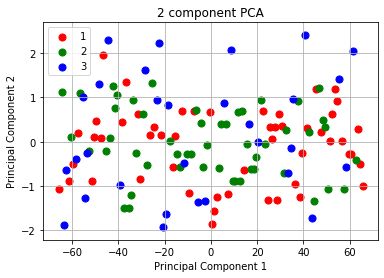

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [1, 2, 3]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

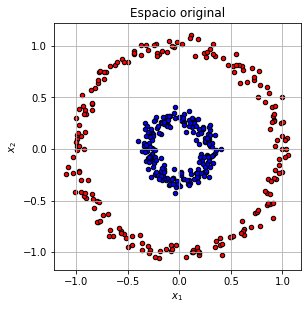

In [16]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

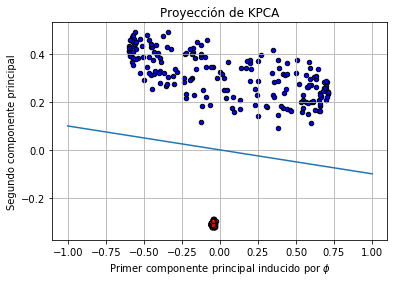

In [17]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()